# Install and Import Dependencies

In [ ]:
!pip install pystan
!pip install fbprophet
!pip install prophet holidays

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl.metadata (2.9 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl.metadata (6.3 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached PyMeeus-0.5.12-py3-none-any.whl
  Using cached ephem-4.1.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.0 kB)
Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
Using cached ephem-4.1.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: 

In [ ]:
import pandas as pd
from prophet import Prophet

# Read in Data and Process Dates

In [ ]:
df = pd.read_csv('/content/sample_data/retail_dataset.csv')

In [ ]:
df.head()

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


In [ ]:
df.describe()

,Time Date,Product,Value
count,1.080000e+03,1080.0,1080.000000
mean,1.567207e+07,2667437.0,4048.117478
std,8.791548e+06,0.0,1439.945783
min,1.012018e+06,2667437.0,2042.813500
25%,8.069518e+06,2667437.0,2632.498599
50%,1.556702e+07,2667437.0,4256.000000
75%,2.308452e+07,2667437.0,5288.248910
max,3.112202e+07,2667437.0,8147.739600


In [ ]:
print(df['Product'].unique())
print(df['Store'].unique())

[2667437]
['QLD_CW_ST0203']


In [ ]:
# coverting Time Date into date time format
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.to_datetime(df['Year']+'-'+df['Month']+'-'+df['Day'])

In [ ]:
df.head()

,Time Date,Product,Store,Value,Year,Month,Day,ds
0,1012018,2667437,QLD_CW_ST0203,2926.000,2018,01,1,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531,2018,01,2,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000,2018,01,3,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000,2018,01,4,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000,2018,01,5,2018-01-05


In [ ]:
df.dtypes

,0
Time Date,int64
Product,int64
Store,object
Value,float64
Year,object
Month,object
Day,object
ds,datetime64[ns]


In [ ]:
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']

In [ ]:
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


# Train Model

In [ ]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpptx0hvip/tfmr4zg6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpptx0hvip/50cbcfbv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91339', 'data', 'file=/tmp/tmpptx0hvip/tfmr4zg6.json', 'init=/tmp/tmpptx0hvip/50cbcfbv.json', 'output', 'file=/tmp/tmpptx0hvip/prophet_model32t0rgvu/prophet_model-20241024044318.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:43:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:43:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# Forecasting

In [ ]:
future = m.make_future_dataframe(periods=100, freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3041.771182,804.431899,3953.781326,3041.771182,3041.771182,-640.520201,-640.520201,-640.520201,468.866564,...,16.599243,16.599243,16.599243,-1125.986008,-1125.986008,-1125.986008,0.0,0.0,0.0,2401.250981
1,2018-01-02,3042.521656,752.620151,4030.097030,3042.521656,3042.521656,-650.771051,-650.771051,-650.771051,468.866564,...,-11.296388,-11.296388,-11.296388,-1108.341227,-1108.341227,-1108.341227,0.0,0.0,0.0,2391.750605
2,2018-01-03,3043.272131,740.108583,4048.274283,3043.272131,3043.272131,-625.066377,-625.066377,-625.066377,468.866564,...,-4.417865,-4.417865,-4.417865,-1089.515076,-1089.515076,-1089.515076,0.0,0.0,0.0,2418.205755
3,2018-01-04,3044.022606,952.466282,4096.760484,3044.022606,3044.022606,-578.237548,-578.237548,-578.237548,468.866564,...,22.477984,22.477984,22.477984,-1069.582096,-1069.582096,-1069.582096,0.0,0.0,0.0,2465.785058
4,2018-01-05,3044.773081,877.137906,3997.155672,3044.773081,3044.773081,-614.374860,-614.374860,-614.374860,468.866564,...,-34.571885,-34.571885,-34.571885,-1048.669539,-1048.669539,-1048.669539,0.0,0.0,0.0,2430.398221


In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1175,2021-03-22,4237.001097,2158.484284,5298.836151,4233.686538,4240.588630,-514.326569,-514.326569,-514.326569,468.866564,...,16.599243,16.599243,16.599243,-999.792376,-999.792376,-999.792376,0.0,0.0,0.0,3722.674528
1176,2021-03-23,4238.073097,2047.766484,5370.924182,4234.731309,4241.733137,-531.785870,-531.785870,-531.785870,468.866564,...,-11.296388,-11.296388,-11.296388,-989.356046,-989.356046,-989.356046,0.0,0.0,0.0,3706.287227
1177,2021-03-24,4239.145096,2176.134009,5310.075663,4235.765788,4242.877645,-517.247857,-517.247857,-517.247857,468.866564,...,-4.417865,-4.417865,-4.417865,-981.696556,-981.696556,-981.696556,0.0,0.0,0.0,3721.897239
1178,2021-03-25,4240.217095,2184.268056,5306.711153,4236.761976,4244.022152,-486.052084,-486.052084,-486.052084,468.866564,...,22.477984,22.477984,22.477984,-977.396632,-977.396632,-977.396632,0.0,0.0,0.0,3754.165011
1179,2021-03-26,4241.289095,2196.337714,5321.786796,4237.784767,4245.166660,-542.659421,-542.659421,-542.659421,468.866564,...,-34.571885,-34.571885,-34.571885,-976.954101,-976.954101,-976.954101,0.0,0.0,0.0,3698.629673


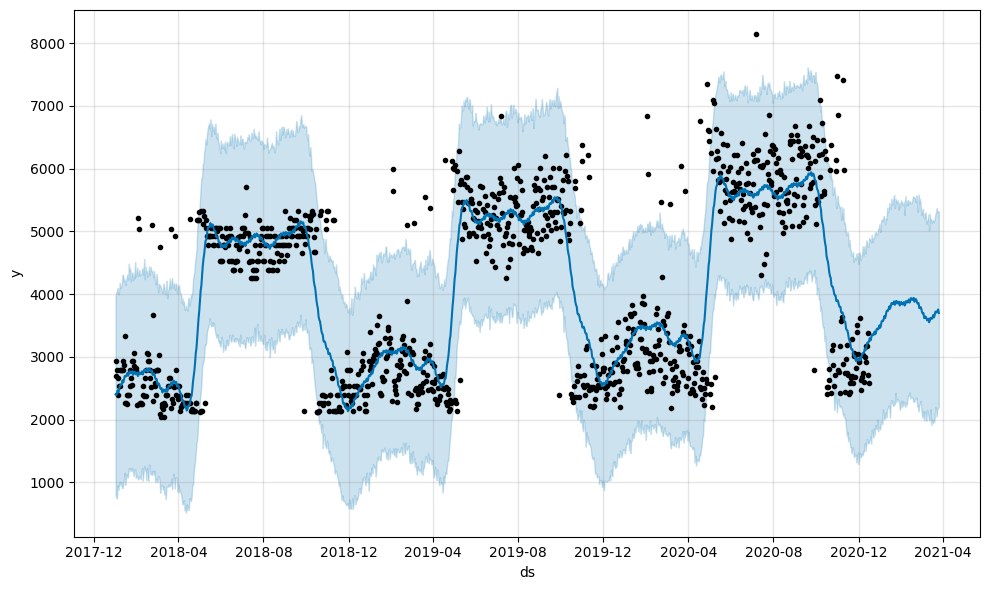

In [ ]:
plot1 = m.plot(forecast)

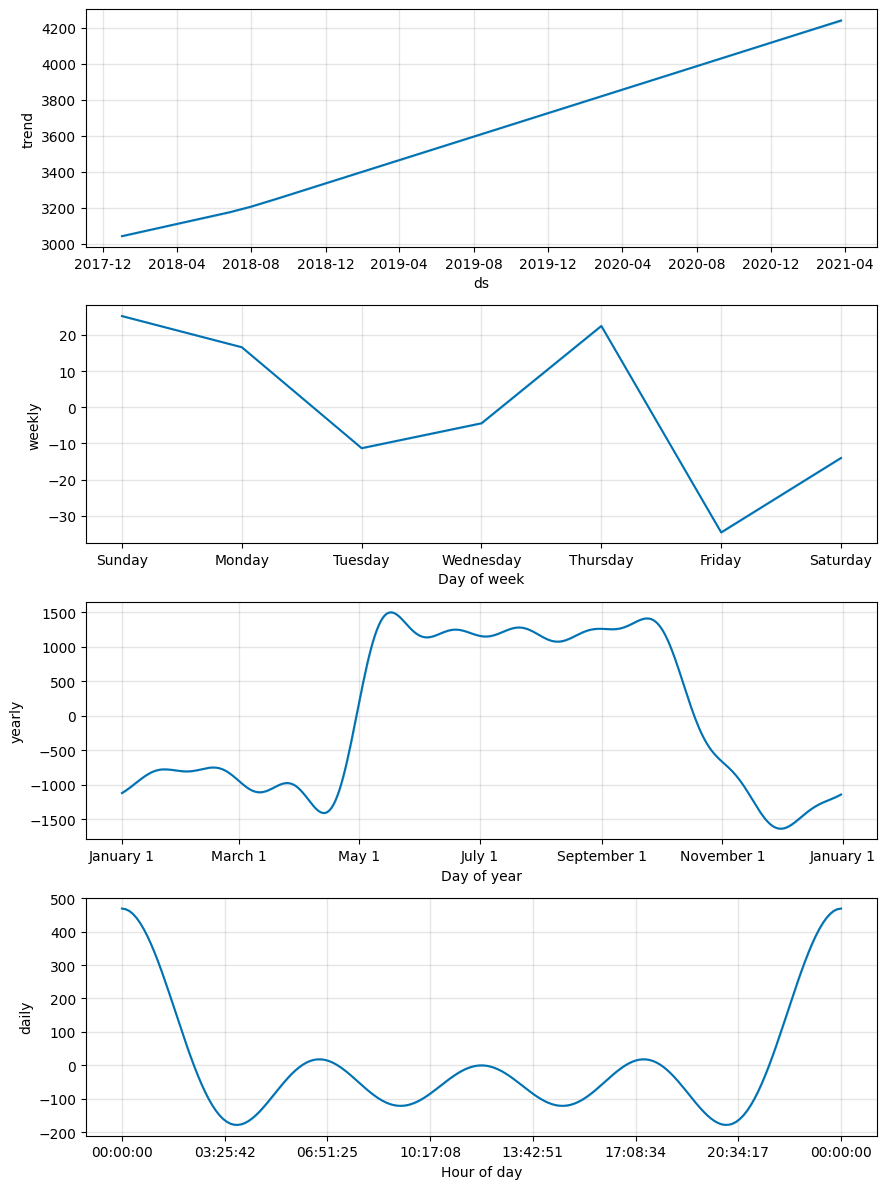

In [ ]:
plot2 = m.plot_components(forecast)